<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Evaluaciones/EvaluacionFinal_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen Final:

Métodos Computacionales para físicos



Nota: La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno.




Las aletas son sólidos que transfieren calor por conducción a lo largo de su geometría y por convección a través de su entorno. La ecuación diferencial que describe la temperatura como función de  la longitud de una  aleta viene dada por :


\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kAc} \right ) ^2 (T-T_{\infty})=0
\end{equation}

donde Ac es el  área de la sección transversal Ac, p es perímetro,
k es el coficiente de conducción que depende de cada material y h el coficiente de convección. La temperatura  $T_{\infty}$ es la temperatura ambiente.


![aleta](https://github.com/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/img/aleta.png?raw=true)



En general, el área de la sección transversal A y el perímetro p de una aleta
varían con x, lo cual hace que esta ecuación diferencial sea difícil de resolver. En el caso especial de una sección transversal constante y conductividad térmica constante, la ecuación diferencial se reduce a

\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}


donde  $\theta=T-T_{\infty}$ y $a=\frac{hp}{kAc}$


Para una aleta suficientemente larga de sección transversal uniforme (Ac =
constante), la temperatura en la base de la aleta viene dada por:


\begin{equation}
\theta(0)=\theta_b=T_b-T_{\infty}
\end{equation}


 y en la punta de la aleta, tenderá a la del medio, por consiguiente $\theta$ tenderá a cero.

\begin{equation}
\theta(L)=T(L)-T_{\infty}=0
\end{equation}

La solucion  exacta viene dada por :

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}



Considerando  una aleta rectangular muy larga, fijada a una
superficie plana de tal forma que la temperatura en el extremo
de la aleta es prácticamente la del aire circundante, es decir,
$T_{\infty}=300K$. Asuma que el ancho es de 5.0 cm, el espesor de 1 mm, es decir, su area $A=5\times 10^{-5}m^2$ y su perimetro de $p=0.102m$. La  conductividad térmica es $k=200 W/m K$, la temperatura en la base de $T_b=313K$ y el coeficiente de transferencia de calor es de $h=20 W/m^2K$. Calcule:



1 (30%) La solución numérica de la ecuación diferencial.

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

3 (25%) Compare la solución numérica con la analítica

4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K





Referencias: Ejercicio e imagenes tomado y adaptado de:

Cengel, Y. A. (2016). “Transferencia de calor y masa” McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V. 3ra. Edición



In [617]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad,simpson,trapz,odeint
from scipy.optimize import newton

# **Solución**

1.

In [618]:
# Condiciones iniciales

Tinf= 300
A = 5*10E-5
p = 0.102
k = 200
Tb = 313
h = 20
a = h*p/k*A


theta = [Tb-Tinf,1E10-3]

In [619]:
def ecuacion(y,t):
  d1dt = y[1]
  d2dt = d1dt-a**2*y[0]
  vectores =[d1dt,d2dt]
  return vectores

In [620]:
longitudes = np.linspace(0,2,100)

In [621]:
sol = odeint(ecuacion,theta, longitudes)

2.

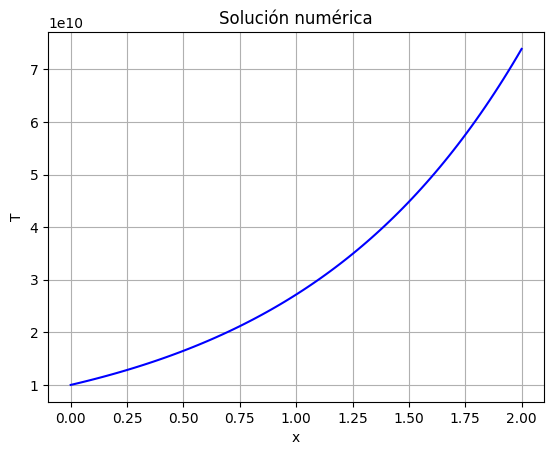

In [622]:
# Gráfica

plt.plot(longitudes,sol[:,1],c="b")
plt.title("Solución numérica")
plt.xlabel("x")
plt.ylabel("T")
plt.grid()

3.

In [623]:
def exacta(x):
  T = Tinf+((Tb-Tinf)*np.exp(-x*np.sqrt(h*p/k)))
  return T

In [624]:
x_l = np.linspace(0,200,100) # aleta muy larga

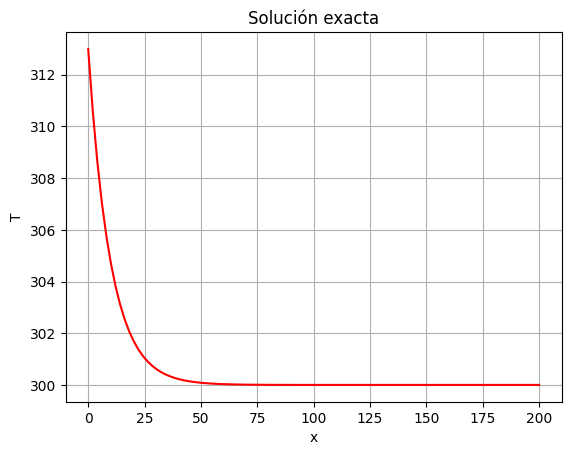

In [625]:
plt.plot(x_l,exacta(x_l),c="r")
plt.title("Solución exacta")
plt.xlabel("x")
plt.ylabel("T")
plt.grid()

4.

In [626]:
teorica = lambda x: (313*np.exp(-x*np.sqrt(h*p/k)))-305

In [627]:
punto_aleta = newton(teorica,0) # con la secante
punto_aleta

0.2563631988969473